# 0. HE HV Sharepoint Data Database

In [29]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MultiLabelBinarizer

In [30]:
# Files Provided
os.listdir("data") 

['DTB Certificates.csv',
 'Job History.csv',
 'OM Certificates.csv',
 '.DS_Store',
 'LTB Certificates.csv',
 'Your Job History.csv',
 'LTB Certificate ID.csv',
 'Special Skills DTB.csv',
 'PASS Certificate ID.csv',
 'Training Name.csv',
 'PASS Certificates.csv',
 'CS Certificate ID.csv',
 'CS Certificates.csv',
 'Special Skills LTB.csv',
 'GIS Certificates New.csv',
 'GCB Certificates.csv',
 'Basic Data.csv',
 'Trainings.csv',
 'DTB Certificate ID.csv',
 'Site with certifications']

In [31]:
def plot_horizontal_bar_chart(df, column):
    # Calculate counts and percentages
    counts = df[column].value_counts()
    percentages = counts / counts.sum() * 100
    
    # Set the color map (tab20)
    color_map = plt.get_cmap('tab20')
    colors = color_map(range(len(counts)))
    
    counts = counts[:15]
    
    # Create the horizontal bar chart
    fig, ax = plt.subplots(figsize=(10, 7))
    bars = ax.barh(counts.index, counts, color=colors)

    # Add labels (numbers and percentages) on the bars
    for i, bar in enumerate(bars):
        count = counts[i]
        percentage = percentages[i]
        ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
                f'{count} ({percentage:.2f}%)', va='center', fontsize=10)

    max_count = counts.max()
    ax.set_xlim(0, max_count * 1.2)
        
    # Set labels and title
    ax.set_xlabel('Count')
    ax.set_title(f'Distribution of {column}',fontweight="bold")
    
    plt.gca().invert_yaxis()
    
    plt.tight_layout()
    plt.show()
    
    
def plot_histogram_with_labels(df, column, bins=10,color='plum'):
    # Create the histogram and get the count in each bin
    counts, bin_edges, bars = plt.hist(df[column], bins=bins, color='skyblue', edgecolor='black')

    # Calculate percentages
    percentages = (counts / counts.sum()) * 100
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the histogram
    bars = ax.bar(bin_edges[:-1], counts, width=np.diff(bin_edges), edgecolor='black', align='edge',color=color)
    
    # Add labels for each bar (number and percentage)
    for i, bar in enumerate(bars):
        count = counts[i]
        percentage = percentages[i]
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 2,
                f'{int(count)}\n ({percentage:.2f}%)', ha='center', fontsize=10, fontweight="bold")

    # Increase ylim by 20% for padding
    ax.set_ylim(0, max(counts) * 1.2)

    # Set labels and title
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('Count')
    ax.set_title(f'Histogram of {column} with Count and Percentage Labels')

    plt.tight_layout()
    plt.show()

## 0.1 FSE Basic Data

In [32]:
basic_df = pd.read_csv("data/Basic Data.csv")

basic_df["Not available as FSE"] = basic_df["Not available as FSE"].astype(str)
basic_df["Freelancer/External company"] = basic_df["Freelancer/External company"].astype(str)

basic_df["Date of Birth"] = pd.to_datetime(basic_df["Date of Birth"],errors="coerce")
basic_df["Created"] = pd.to_datetime(basic_df["Created"], format='%d.%m.%Y %H:%M')

# Calculate the current date
current_date = pd.to_datetime(datetime.now().date())

# Calculate age and add it as a new column
basic_df['Age'] = (current_date - basic_df['Date of Birth']).dt.days // 365.25
basic_df['Tenure'] = (current_date - basic_df['Created']).dt.days // 30

basic_df

,FS-No.,LDAP ID,Last Name,Given Name,Date of Birth,Citizenship,Country of Employment,Company of Employment,PG Code,E-Mail,Not available as FSE,Freelancer/External company,Picture,Comments,Created,ID,Age,Tenure
0,NaN,NaN,Cleary,Matthew,1980-01-01,Australia,Australia,Hitachi Energy Australia,NaN,NaN,True,False,NaN,Fake date of birth and citizenship,2024-03-12 15:28:00,884,44.0,7
1,NaN,Retired,Deligi,Erwin,1960-01-01,Brazil,Brazil,Hitachi Energy Brazil,NaN,NaN,True,False,NaN,"Retired, fake date of birth and citizenship",2024-03-12 15:42:00,885,64.0,7
2,NaN,NaN,Carrier,Jean Francois,1980-01-01,Canada,Canada,Hitachi Energy Canada,NaN,NaN,True,False,NaN,Fake date of birth and citizenship,2024-03-12 15:44:00,886,44.0,7
3,NaN,NaN,Mozorov,Evgeny,1980-01-01,Russia,Russia,Hitachi Energy Russia,NaN,NaN,True,False,NaN,Third party - Fake date of birth,2024-03-13 09:58:00,892,44.0,7
4,NaN,NaN,Simpao,Philipp,1980-01-01,Philippines,Philippines,Hitachi Energy Philippines,NaN,NaN,True,False,NaN,"Fake date of birth, fake citizenship",2024-03-13 10:04:00,895,44.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,71737654.0,71737654,Abdullah AlGarawi,Amer,NaT,[],Saudi Arabia,HITACHI ENERGY LTD,2657,mailto: AMER.ALGARAWI@HITACHIENERGY.COM,False,False,NaN,NaN,2024-04-18 14:07:00,962,NaN,6
934,71737746.0,71737746,Omar ALQuaimi,Khaled,NaT,[],Saudi Arabia,HITACHI ENERGY LTD,2657,mailto: KHALED.OMAR-ALQUAIMI@HITACHIENERGY.COM,False,False,NaN,NaN,2024-04-18 15:05:00,980,NaN,6
935,71767776.0,71767776,Tay,Kelvin,1980-01-01,[],Singapore,HITACHI ENERGY SINGAPORE PTE. LTD.,2226,mailto: kelvin.tay@hitachienergy.com,True,False,NaN,left June 2023,2024-03-21 08:10:00,937,44.0,7
936,71767784.0,71767784,Tolentino,Nicanor P,1980-01-01,Saudi Arabia,Saudi Arabia,Hitachi Energy Ltd,2657,mailto: nicanor.tolentino@hitachienergy.com,True,False,NaN,Fake date of birth and citizenship,2024-03-13 08:20:00,891,44.0,7


/var/folders/pl/01wztq8d2sn5gx_ff8mqjdxr0000gn/T/ipykernel_7904/454426724.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = counts[i]
/var/folders/pl/01wztq8d2sn5gx_ff8mqjdxr0000gn/T/ipykernel_7904/454426724.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = percentages[i]


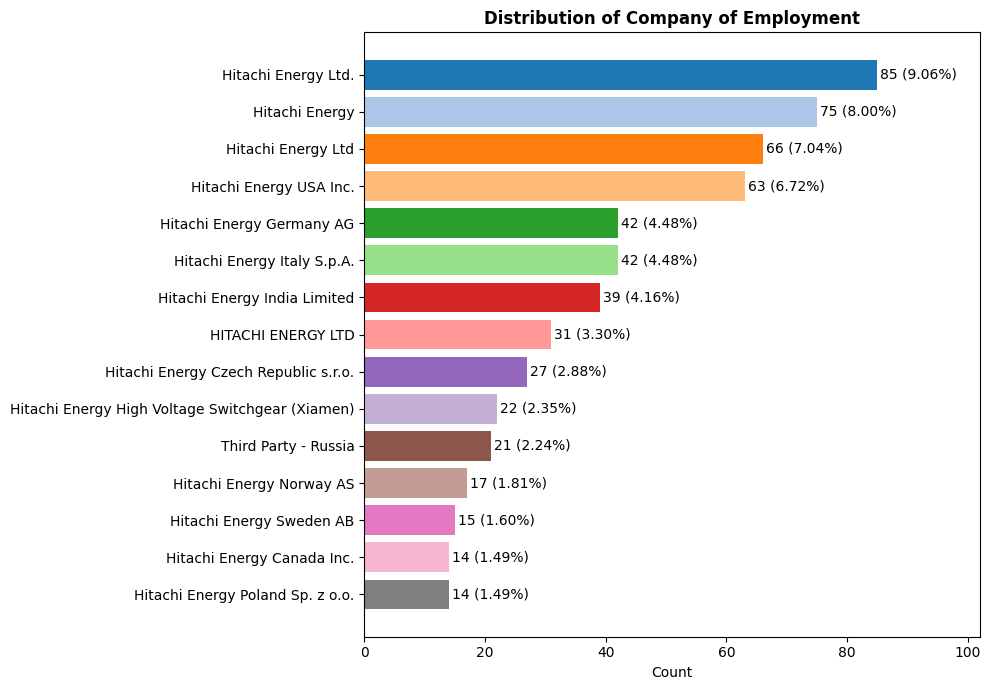

In [33]:
plot_horizontal_bar_chart(basic_df, "Company of Employment")

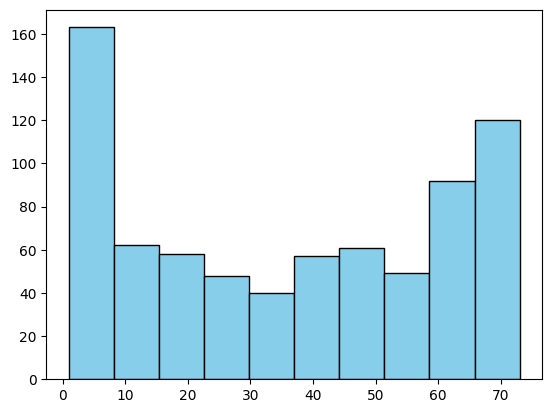

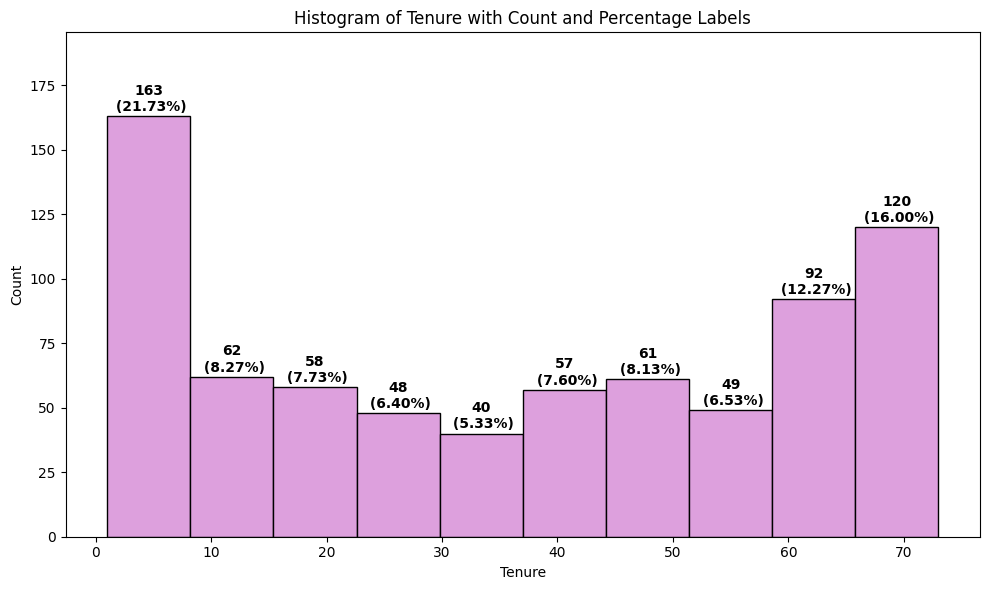

In [34]:
plot_histogram_with_labels(basic_df[basic_df["Not available as FSE"]=="False"],"Tenure")

In [35]:
basic_df["Tenure"].mode()

0    61
Name: Tenure, dtype: int64

## 0.2 FSE Trainings

In [36]:
training_df = pd.read_csv("data/Trainings.csv")
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Employee:FS-No.   475 non-null    object
 1   Employee:LDAP ID  473 non-null    object
 2   Employee          489 non-null    object
 3   Level             489 non-null    object
 4   Training Name     489 non-null    object
 5   Training Start    489 non-null    object
 6   Training End      489 non-null    object
 7   Training Center   50 non-null     object
 8   Attachments       489 non-null    int64 
 9   Created           489 non-null    object
 10  Modified By       489 non-null    object
 11  ID                489 non-null    int64 
dtypes: int64(2), object(10)
memory usage: 46.0+ KB


In [37]:
[print(x,end=" | ") for x in training_df.columns]

Employee:FS-No. | Employee:LDAP ID | Employee | Level | Training Name | Training Start | Training End | Training Center | Attachments | Created | Modified By | ID | 

[None, None, None, None, None, None, None, None, None, None, None, None]

/var/folders/pl/01wztq8d2sn5gx_ff8mqjdxr0000gn/T/ipykernel_7904/1683444734.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  training_df["Training Start"] = pd.to_datetime(training_df["Training Start"],errors='coerce')


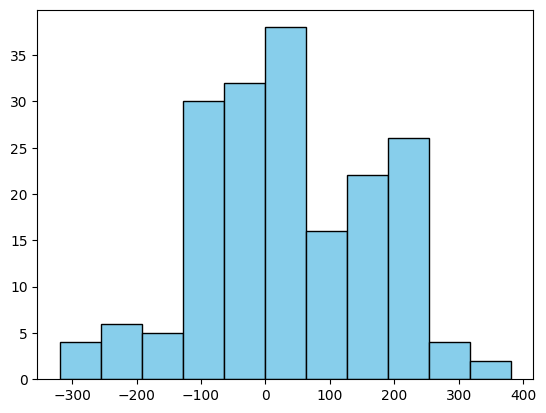

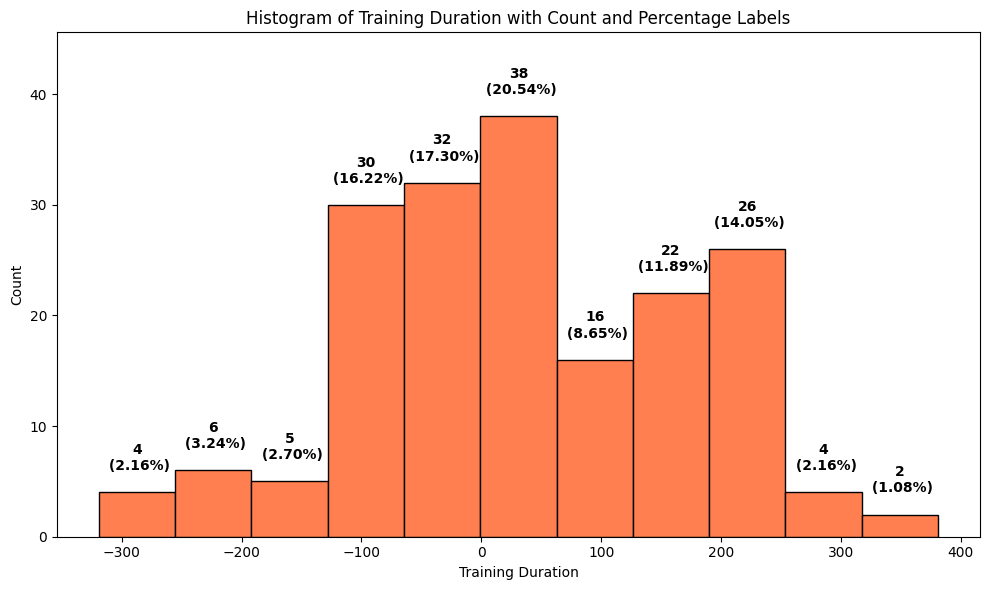

In [38]:
training_df["Training Start"] = pd.to_datetime(training_df["Training Start"],errors='coerce')
training_df["Training End"] = pd.to_datetime(training_df["Training End"],errors='coerce')

training_df = training_df.dropna(subset="Training End")
training_df["Training Duration"] = training_df["Training End"] - training_df["Training Start"]
training_df["Training Duration"] = training_df["Training Duration"].dt.days

plot_histogram_with_labels(training_df,"Training Duration",bins=11,color="coral")


#training_df.groupby("Training Name")["Training Duration"].mean().to_frame().sort_values(by="Training Duration")

In [39]:
pd.read_csv("data/Trainings.csv")

,Employee:FS-No.,Employee:LDAP ID,Employee,Level,Training Name,Training Start,Training End,Training Center,Attachments,Created,Modified By,ID
0,1405,70836497,Rajaram Jayachandran - 23.11.1990,3,GIS-T Commissioning Classic,30.09.2024,11.10.2024,Switzerland,1,11.10.2024 16:20,Zsofia Fodor,558
1,1139,71679804,Pakkirisamy Prabakaran - 25.03.1990,3,GIS-T Commissioning Classic,30.09.2024,11.10.2024,Switzerland,1,11.10.2024 16:20,Zsofia Fodor,559
2,1467,71114550,Georgiev Georgi - 10.06.1996,3,GIS-T Commissioning Classic,30.09.2024,11.10.2024,Switzerland,1,11.10.2024 16:23,Zsofia Fodor,560
3,1414,71029377,Vidović Stjepan - 06.07.1994,3,GIS-T Commissioning Classic,30.09.2024,11.10.2024,Switzerland,1,11.10.2024 16:23,Zsofia Fodor,561
4,1460,71069582,Kunte Ondrej - 15.03.1993,3,GIS-T Commissioning Classic,30.09.2024,11.10.2024,Switzerland,1,11.10.2024 16:23,Zsofia Fodor,562
...,...,...,...,...,...,...,...,...,...,...,...,...
484,17; 331; 332; 320; 25,71674329; 71674342; 71674343; 71674328; Retired,"Galenziowski Jens - 26.08.1963,Hansch Sebastia...",4,HG,26.11.2012,29.11.2012,NaN,0,04.02.2020 11:41,Axel Kuecholl,210
485,331; 332; 320,71674342; 71674343; 71674328,"Hansch Sebastian - 07.08.1986,Hartig David - 0...",4,HE / HEC 3-6,16.01.2012,20.01.2012,NaN,0,04.02.2020 10:23,Axel Kuecholl,209
486,331,71674342,Hansch Sebastian - 07.08.1986,3,Commissioning and Diagnostic Tests,20.10.2011,11.04.2012,NaN,0,04.02.2020 10:21,Axel Kuecholl,208
487,195,71668039,Geng Xuexian - 09.01.1978,3,Commissioning and Diagnostic Tests,01.04.2010,16.04.2010,NaN,0,22.10.2019 14:39,Axel Kuecholl,184


## 0.3 FSE Jobs Data

In [40]:
jobs_df = pd.read_csv("data/Job History.csv")
jobs_df

,Assessment Failed,Employee,Start Date,End Date,Product Line,Product Type,Job Type,Country,Plant Name,Job Description,...,Trainer Comments,Trainee informed?,Responsible Technical Expert,Responsible Trainer,Created By,Modified By,Modified,Created,Sign-off status,ID
0,False,Abudawas Yazan - 07.10.1991,04.06.2025,07.06.2023,GIS,ELK-04/145C,On-site Assessment,Saudi Arabia,South Berri 132kV,performing the HV Test for the GIS,...,NaN,False,NaN,NaN,Yazan Abudawas,Yazan Abudawas,28.05.2024 12:44,28.05.2024 12:44,NaN,13977
1,False,Shaikh Nizamuddin - 30.12.1899,01.11.2024,13.03.2024,GIS-ST,ELK-04/145C,Normal Job,Saudi Arabia,132kV GIS Najran-2,Installation,...,NaN,False,NaN,NaN,Nizamuddin N Shaikh,Nizamuddin N Shaikh,28.05.2024 11:47,28.05.2024 11:47,NaN,13951
2,False,Patel Keyur - 06.02.1990,19.10.2024,26.10.2023,GIS-ST,ELK-04/145C,Normal Job,Saudi Arabia,Upgrade SS%2340,High Voltage & Partial Discharge on site,...,NaN,False,NaN,NaN,keyur Patel,keyur Patel,01.05.2024 11:10,01.05.2024 11:10,NaN,13531
3,False,Tapias Sergio - 23.06.1990,10.10.2024,08.10.2024,GIS-ST,ELK-04/170,Normal Job,United States,PGE Reedville 115kV GIS,HVPD Testing,...,NaN,False,NaN,NaN,Sergio A Tapias,Sergio A Tapias,10.10.2024 19:11,10.10.2024 19:11,NaN,14676
4,False,Guedel Rolf - 30.08.1977,26.09.2024,26.09.2024,PASS,PASS Motor Drive,Normal Job,Switzerland,UW Burgdorf,Update of parameters,...,NaN,False,NaN,NaN,Rolf Guedel,Rolf Guedel,27.09.2024 14:02,27.09.2024 14:02,NaN,14672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12625,False,Oester Rolf - 20.08.1971,01.01.1995,30.12.1998,LTB,several,Normal Job,Switzerland,"Overhauls on LTB&%2339;s <br>(type M, V, TOFQ,...",Overhaul,...,NaN,False,NaN,NaN,GIS-GCB.process-flow,GIS-GCB.process-flow,11.07.2022 09:30,11.07.2022 09:30,NaN,8094
12626,False,Gut Markus - 29.06.1975,01.01.1994,31.12.2004,GCB,HG,Normal Job,Switzerland,ABB Factory,Assambling,...,NaN,False,NaN,NaN,Martin Menzel,Martin Menzel,18.02.2019 16:35,18.02.2019 16:35,NaN,337
12627,False,Zintz Dietmar - 09.07.1968,20.01.1992,31.05.1997,GIS-ST,ELK-04 Original,Normal Job,Germany,n.a.,Diverse jobs in the factory,...,NaN,False,NaN,NaN,Dietmar Zintz,Dietmar Zintz,03.06.2024 10:04,03.06.2024 10:04,NaN,14185
12628,False,Ait Ali Djamel - 23.11.1977,23.11.1977,14.03.2020,GIS-ST,ELK-04 / 735,Normal Job,Philippines,NaN,Overhauling HMB1 and HMB1-s,...,NaN,False,NaN,NaN,Annamalai Thirumalraj,Annamalai Thirumalraj,24.11.2023 13:24,24.11.2023 13:24,NaN,12319


/var/folders/pl/01wztq8d2sn5gx_ff8mqjdxr0000gn/T/ipykernel_7904/3274197925.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs_df["Job Duration"] = jobs_df["End Date"] - jobs_df["Start Date"]
/var/folders/pl/01wztq8d2sn5gx_ff8mqjdxr0000gn/T/ipykernel_7904/3274197925.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs_df["Job Duration"] = jobs_df["Job Duration"].dt.days


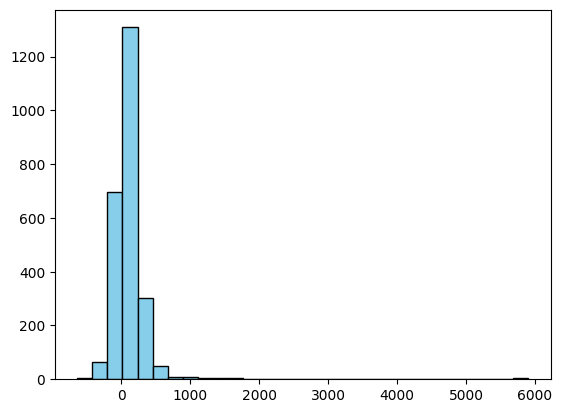

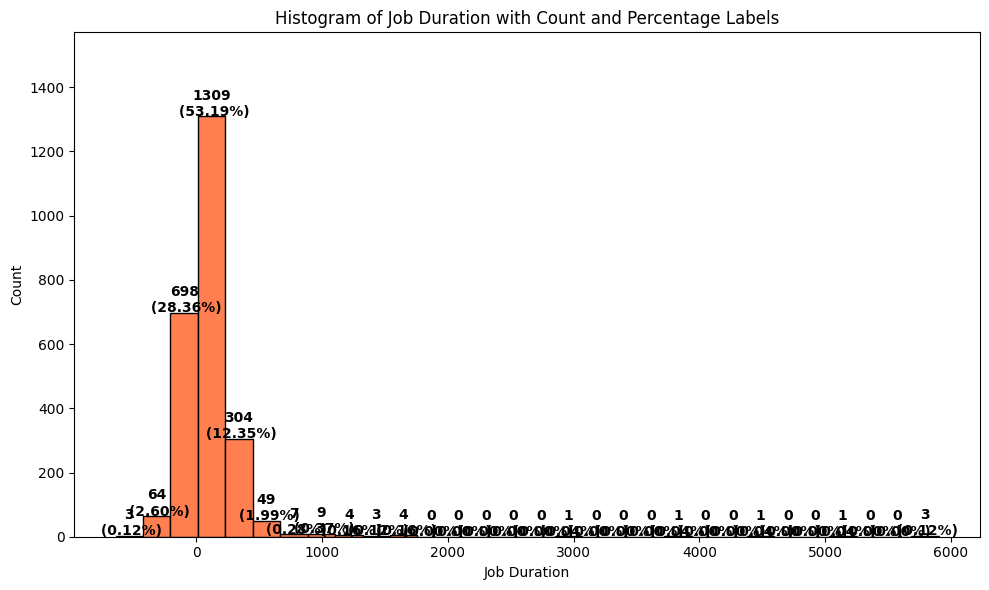

In [41]:
jobs_df["Start Date"] = pd.to_datetime(jobs_df["Start Date"],errors='coerce')
jobs_df["End Date"] = pd.to_datetime(jobs_df["End Date"],errors='coerce')

jobs_df = jobs_df.dropna(subset="End Date")
jobs_df["Job Duration"] = jobs_df["End Date"] - jobs_df["Start Date"]
jobs_df["Job Duration"] = jobs_df["Job Duration"].dt.days

plot_histogram_with_labels(jobs_df,"Job Duration",bins=30,color="coral")


## 0.4 Certifications

In [42]:
# Get the Certificate files from data folder
certificate_dbs = pd.Series(os.listdir("data"))[pd.Series(os.listdir("data")).str.contains("Certificates")]

# create new empty db
cert_df = pd.DataFrame()

# In each dataframe, ensure that the 
for x in certificate_dbs:
    print('\033[1m'+x+'\033[0m')
    #temp_df = pd.read_csv(f"data/{x}")
    
    print(list(pd.read_csv(f"data/{x}").columns))
    print(len(pd.read_csv(f"data/{x}").columns))

DTB Certificates.csv
['Employee: FS-No.', 'Employee: LDAP ID', 'Employee', 'DTB Certificates', 'Issuance Date', 'IMPORTANT NOTES', 'Expiry date', 'Special Skills', 'Assessor', 'Inactive', 'Remarks', 'Attachments', 'Limited certificate?', 'Training Center']
14
OM Certificates.csv
['Employee', 'OM Certicate', 'Issuance Date', 'Expiry Date', 'Training Center', 'Remark', 'Attachments', 'Created', 'ID', 'Limited certificate?']
10
LTB Certificates.csv
['Employee:FS-No.', 'Employee: LDAP ID', 'Employee', 'LTB Certificate', 'Expiry Date', 'Assessor', 'Special Skills', 'Remarks', 'Limited certificate', 'Training Center', 'Attachments']
11
PASS Certificates.csv
['Employee:FS-No.', 'Employee: LDAP ID', 'Employee', 'PASS Certificate', 'Expiry date', 'Assessor', 'Remarks', 'Employee:ID', 'Limited certificate?', 'Training Center']
10
CS Certificates.csv
['Employee', 'Controlled Switching Certificate', 'Expiry Date', 'Trainer', 'Supervisor', 'Special Skills', 'Product Line', 'Remarks', 'Limited certi

In [51]:
gis_certdf = pd.read_csv("data/GIS Certificates New.csv")
gis_certdf[gis_certdf["Assessor"]==True]["Employee: FS-No."]

1          1023.0
2          1022.0
4          1077.0
5          1021.0
6          1008.0
          ...    
518    71669236.0
519    71669472.0
520    71669279.0
532    71669469.0
596        1393.0
Name: Employee: FS-No., Length: 93, dtype: float64

In [57]:
basic_df[basic_df["FS-No."].isin(gis_certdf[gis_certdf["Assessor"]==True]["Employee: FS-No."])]["Country of Employment"].value_counts()

Country of Employment
Switzerland             20
Germany                 10
United States            9
China                    7
United Arab Emirates     5
Saudi Arabia             4
Czech Republic           3
Canada                   2
India                    2
Finland                  1
Spain                    1
Chile                    1
Qatar                    1
Name: count, dtype: int64

In [44]:
# Load in GIS certificates dataset
gis_certdf = pd.read_csv("data/GIS Certificates New.csv")

# Drop certificates with no Issuance Date
gis_certdf = gis_certdf.dropna(subset="Issuance Date")

# Convert the Issuance date to datetime
gis_certdf["Issuance Date"] = pd.to_datetime(gis_certdf["Issuance Date"])

# Clean up GIS Certification name
gis_certdf["GIS Certification Clean"] = gis_certdf["GIS Certification"].apply(lambda x : [x.strip() for x in x.split(",")])

mlb = MultiLabelBinarizer()

# Apply the transformation and create a dataframe for the one-hot encoded columns
one_hot_df = pd.DataFrame(mlb.fit_transform(gis_certdf['GIS Certification Clean']), columns=mlb.classes_)

# Replace 1s with the corresponding value from the 'value_column'
for col in one_hot_df.columns:
    one_hot_df[col] = pd.to_datetime(np.where(one_hot_df[col] == 1, gis_certdf['Issuance Date'], pd.NaT))
    
#pd.concat([gis_certdf,one_hot_df],axis=1)
#gis_certdf#.iloc[3]
gis_certdf.groupby("Employee").first()

/var/folders/pl/01wztq8d2sn5gx_ff8mqjdxr0000gn/T/ipykernel_7904/3407574986.py:8: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  gis_certdf["Issuance Date"] = pd.to_datetime(gis_certdf["Issuance Date"])


,Employee: LDAP ID,Assessor,GIS Certification,Special Skills,Expiry Date,Attachments,Limited certificate?,Remarks,IMPORTANT NOTES,Training Center,ID,Employee: FS-No.,Email,Issuance Date,Created,Created By,Modified By,GIS Certification Clean
Employee,,,,,,,,,,,,,,,,,,
Abdelmoty Mahmoud - 30.12.1899,71008127,False,1 SAUDI - Trained GIS-T,[],31.12.2026,0,False,None,None,Saudi Arabia,677,71008127.0,None,2024-04-18,18.04.2024 15:17,Renske Harms,Renske Harms,[1 SAUDI - Trained GIS-T]
Abdelrahman Yazan - 20.05.1990,71687176,False,LS Work in energized substation,[],09.08.2027,1,False,None,None,Switzerland,770,1231.0,yazanali.abdelrahman@hitachienergy.com,2024-08-09,21.08.2024 16:17,Zsofia Fodor,Zsofia Fodor,[LS Work in energized substation]
Abdul Nazeer Yusuf Sherif - 30.12.1899,24321939,False,1 SAUDI - Trained GIS-T,[],31.12.2026,0,False,None,None,Saudi Arabia,682,24321939.0,None,2024-04-18,18.04.2024 15:19,Renske Harms,Renske Harms,[1 SAUDI - Trained GIS-T]
Abdullah AlGarawi Amer - 30.12.1899,71737654,False,0 SAUDI - In Training,[],31.12.2030,0,False,None,None,Saudi Arabia,656,71737654.0,None,2024-04-18,18.04.2024 14:23,Renske Harms,Renske Harms,[0 SAUDI - In Training]
Abualrahi Mohammad Murtadha - 30.12.1899,71021638,False,1 SAUDI - Trained GIS-T,[],31.12.2026,0,False,None,None,Saudi Arabia,678,71021638.0,None,2024-04-18,18.04.2024 15:18,Renske Harms,Renske Harms,[1 SAUDI - Trained GIS-T]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wu Zhi Wu - 11.01.1988,71669472,True,"4 GIS-ST Maintenance ,3 GIS-ST Commissioning ...",Exch. HMB-4/-8 Operating Mechanism,30.05.2025,0,False,None,None,China,631,71669472.0,None,2024-07-03,18.04.2024 10:54,Renske Harms,Renske Harms,"[4 GIS-ST Maintenance, 3 GIS-ST Commissioning,..."
Wyser Tobias - 20.10.1986,71021950,False,LS Work in energized substation,[],09.08.2027,1,False,None,None,Switzerland,763,1463.0,tobias.wyser@hitachienergy.com,2024-08-09,21.08.2024 16:05,Zsofia Fodor,Zsofia Fodor,[LS Work in energized substation]
Zeibig Andreas - 11.06.1980,71674874,True,"4 ELK-02 ,4 ELK-03 ,4 ELK-04, EXK-0, EXK-01 ...","CEU Exchange ELK-04,CEU Retrofit ELK-02,CEU Re...",04.07.2026,1,False,None,None,Switzerland,221,1244.0,andreas.zeibig@hitachienergy.com,2023-07-05,28.01.2020 12:08,Joerg Vater,Zsofia Fodor,"[4 ELK-02, 4 ELK-03, 4 ELK-04, EXK-0, EXK-01, ..."


In [45]:
basic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   FS-No.                       933 non-null    float64       
 1   LDAP ID                      910 non-null    object        
 2   Last Name                    938 non-null    object        
 3   Given Name                   938 non-null    object        
 4   Date of Birth                412 non-null    datetime64[ns]
 5   Citizenship                  938 non-null    object        
 6   Country of Employment        938 non-null    object        
 7   Company of Employment        938 non-null    object        
 8   PG Code                      868 non-null    object        
 9   E-Mail                       912 non-null    object        
 10  Not available as FSE         938 non-null    object        
 11  Freelancer/External company  938 non-null    